# Predicting Diamond Prices
## Phase 1: Data Preparation & Visualisation

#### Group Name:

#### Name(s) & ID(s) of Group Members:

#### 

## Table of contents

* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



## (Task 1) Introduction <a id='itr'></a> 

### (Task 1.1) Dataset Source<a id='Dataset-Source'></a>

Sample Source



### Dataset Details

The dataset is about the 'Prices of Diamonds' and contains information about various attributes such as their cut, carat, colour, clarity, depth, etc. These features seem to be sufficient for an attempt for predictive modeling of Diamond prices as a regression problem.

This dataset has a total of 10 features and 53941 observations. Houses with no price information have already been removed from the dataset. 

**Dataset Retrieval**

- We read in the dataset from our GitHub repository and load the modules we will use throughout this report.
- We display 10 randomly sampled rows from this dataset.

In [397]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###

In [398]:
# name of the dataset to be imported from our GitHub account
df_name = 'diamonds.csv'

In [399]:
df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/' + df_name
url_content = requests.get(df_url, verify=False).content
ds_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [400]:
ds_df.sample(10, random_state = 999)


,carat,cut,color,clarity,depth,table,x,y,z,price
38848,0.40,Ideal,I,IF,62.2,56.0,4.75,4.71,2.94,1050
9023,1.04,Ideal,H,SI1,61.9,57.0,6.49,6.46,4.01,4515
51799,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,2415
35562,0.35,Premium,G,VS1,61.2,58.0,4.54,4.51,2.77,906
18923,1.49,Very Good,G,SI2,62.5,58.0,7.20,7.26,4.52,7773
53847,0.71,Ideal,H,VVS1,60.8,56.0,5.75,5.83,3.52,2741
848,0.72,Ideal,H,VVS2,60.9,57.0,5.79,5.77,3.52,2869
9756,0.90,Premium,G,VS1,62.7,58.0,6.06,6.15,3.83,4661
15655,1.04,Premium,F,VS2,59.6,62.0,6.62,6.56,3.93,6278
3696,0.72,Very Good,G,VVS2,60.1,60.0,5.79,5.82,3.49,3449


In [401]:
print(f"The 'Diamonds Dataset' consists of {len(ds_df.axes[0])} Rows and {len(ds_df.axes[1])} Columns")

The 'Diamonds Dataset' consists of 53940 Rows and 10 Columns


### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [402]:
from tabulate import tabulate

table =[["Name", "Data Type", "Units", "Brief Description"], 
        ["Weight", "Numeric", "Carat (ct)", "A 'carat' is a metric or unit of weight used to determine the size of gemstones, such as a diamond.\nA Carat is equivalent to 0.2 Grams"],
        ["Cut", "Ordinal Categorical", "NA", "Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal"],
        ["Colour", "Ordinal Categorical", "NA", "Color of the diamond, with D being the best and J the worst"],
        ["Clarity", "Ordinal Categorical", "NA", "A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))"],
        ["Depth", "Numeric", "Percentage (%)", "Depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter"],
        ["Table", "Numeric", "Millimetre (mm)", "Table%: The width of the diamond's table expressed as a percentage of its average diameter"],
        ["Price", "Numeric", "US Dollar ($)", "The price of the diamond"],
        ["X", "Numeric", "Millimetre (mm)", "Length in mm"],
        ["Y", "Numeric", "Millimetre (mm)", "Width in mm"],
        ["Z", "Numeric", "Millimetre (mm)", "Height in mm"]
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════════════════╤═════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units           │ Brief Description                                                                                              │
╞═════════╪═════════════════════╪═════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Weight  │ Numeric             │ Carat (ct)      │ A 'carat' is a metric or unit of weight used to determine the size of gemstones, such as a diamond.            │
│         │                     │                 │ A Carat is equivalent to 0.2 Grams                                                                             │
├─────────┼─────────────────────┼─────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Cut     

### Target Feature

For this project, the target feature in this dataset will be the Diamond Price in USD. That is, the price of Diamonds will be predicted based on the explanatory/ descriptive variables. 

## Goals and Objectives

The price of diamonds has fluctuated a great deal over the years. In the early 1900s, the price of diamonds was quite low. This was due to a number of factors, including the fact that there was a large supply of diamonds and not a lot of demand. However, over the course of the 20th century, the price of diamonds slowly but steadily increased. Currently, gemstones like diamond are always in high demand because of their value in the investment market and decreasing supply. For this reason, a model that can accurately predict a Diamond's selling price would have many real-world uses. For instance,This would be useful for jewelers in order to help them determine how to price their diamonds. It could also be used by people looking to buy diamonds, in order to help them understand what price range to expect.

Thus, the main objective of this project is two-fold: (1) predict the price of a Diamond based on its publicly available features, and (2) which features seem to be the best predictors of the diamond sale price. A secondary objective is to perform some exploratory data analysis by basic descriptive statistics & data visualisation plots to gain some insight into the patterns and relationships existing in the data subsequent to some data cleaning & preprocessing, which is the subject of this Phase 1 report.

At this point, we make the important assumption that rows in our dataset are not correlated. That is, we assume that house price observations are independent of one another in this dataset. Of course, this is not a very realistic assumption, however, this assumption allows us to circumvent time series aspects of the underlying dynamics of Diamond prices and also to resort to rather classical predictive models such as multiple linear regression.

## Data Cleaning and Preprocessing

Detailed in this section is the data cleaning and preparation processes underatken for this dataset.

*   Change Variable Names
*   Check Data Type
*   Check for Unique Values
*   Check Missing Values
*   Random Sampling

Let's first view the columns in our dataset.

In [403]:
ds_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

## Change Variable Names

In [404]:
ds_df.columns = ds_df.columns.str.lower().str.strip()

# Rename columns

new_df = {
    'carat': 'Weight',
    'cut': 'Cut',
    'color': 'Colour',
    'clarity': 'Clarity',
    'depth': 'Depth',
    'table': 'Table',
    'x': 'Length',
    'y': 'Width',
    'z': 'Height',
    'price': 'Price'    
}

ds_df = ds_df.rename(columns = new_df)
ds_df.sample(10, random_state=999)


,Weight,Cut,Colour,Clarity,Depth,Table,Length,Width,Height,Price
38848,0.40,Ideal,I,IF,62.2,56.0,4.75,4.71,2.94,1050
9023,1.04,Ideal,H,SI1,61.9,57.0,6.49,6.46,4.01,4515
51799,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,2415
35562,0.35,Premium,G,VS1,61.2,58.0,4.54,4.51,2.77,906
18923,1.49,Very Good,G,SI2,62.5,58.0,7.20,7.26,4.52,7773
53847,0.71,Ideal,H,VVS1,60.8,56.0,5.75,5.83,3.52,2741
848,0.72,Ideal,H,VVS2,60.9,57.0,5.79,5.77,3.52,2869
9756,0.90,Premium,G,VS1,62.7,58.0,6.06,6.15,3.83,4661
15655,1.04,Premium,F,VS2,59.6,62.0,6.62,6.56,3.93,6278
3696,0.72,Very Good,G,VVS2,60.1,60.0,5.79,5.82,3.49,3449


## Check Data Type

In [405]:
# Check for data types
print(f"Data types are below where 'object' indicates a string type:\n ")
print(ds_df.dtypes)
print(f"\nThe intended Data Types match accordingly, therefore no change is further required .")

Data types are below where 'object' indicates a string type:
 
Weight     float64
Cut         object
Colour      object
Clarity     object
Depth      float64
Table      float64
Length     float64
Width      float64
Height     float64
Price        int64
dtype: object

The intended Data Types match accordingly, therefore no change is further required .


## Check Unique Values

In [443]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of Categorical Features</b>'))
ds_df.describe(include='object').T

,count,unique,top,freq
Cut,5000,5,Ideal,2007
Colour,5000,7,G,1017
Clarity,5000,8,SI1,1235


In [407]:
categoricalColumns = ds_df.columns[ds_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(ds_df[col].unique())
    print('')

Unique values for Cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique values for Colour
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique values for Clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



## Check for Missing Values

In [411]:
print(ds_df.isnull().sum())
print(f"\nThe dataset does not contain any missing values, therefore, no further action is required")

Weight     0
Cut        0
Colour     0
Clarity    0
Depth      0
Table      0
Length     0
Width      0
Height     0
Price      0
dtype: int64

The dataset does not contain any missing values, therefore, no further action is required


## Random Sampling

In [418]:
ds_df = ds_df.sample(n=5000, random_state=999)

ds_df.sample(10, random_state=999)


,Weight,Cut,Colour,Clarity,Depth,Table,Length,Width,Height,Price
22294,1.70,Very Good,I,SI1,63.1,57.0,7.51,7.46,4.72,10341
19200,1.56,Premium,F,SI2,58.8,59.0,7.76,7.61,4.52,7950
16621,1.13,Ideal,G,VS2,62.7,57.0,6.68,6.65,4.18,6644
18887,1.01,Ideal,F,VS1,62.0,57.0,6.42,6.46,3.99,7745
38001,0.43,Premium,G,VS1,61.0,58.0,4.92,4.89,2.99,1008
41118,0.41,Ideal,F,VVS1,61.3,54.0,4.79,4.84,2.95,1196
26162,2.00,Very Good,G,SI2,63.5,55.0,8.03,7.93,5.07,15485
44492,0.53,Ideal,G,VS2,60.9,57.0,5.25,5.26,3.20,1598
42045,0.51,Ideal,E,SI2,58.3,62.0,5.20,5.19,3.04,1268
42966,0.50,Good,E,VS2,57.8,60.0,5.20,5.29,3.03,1365


In [421]:
print(f"The refined 'Diamonds Dataset' consists of {len(ds_df.axes[0])} Rows and {len(ds_df.axes[1])} Columns")

The refined 'Diamonds Dataset' consists of 5000 Rows and 10 Columns


## Data Exploration & Visualisation

### One Variable Plot

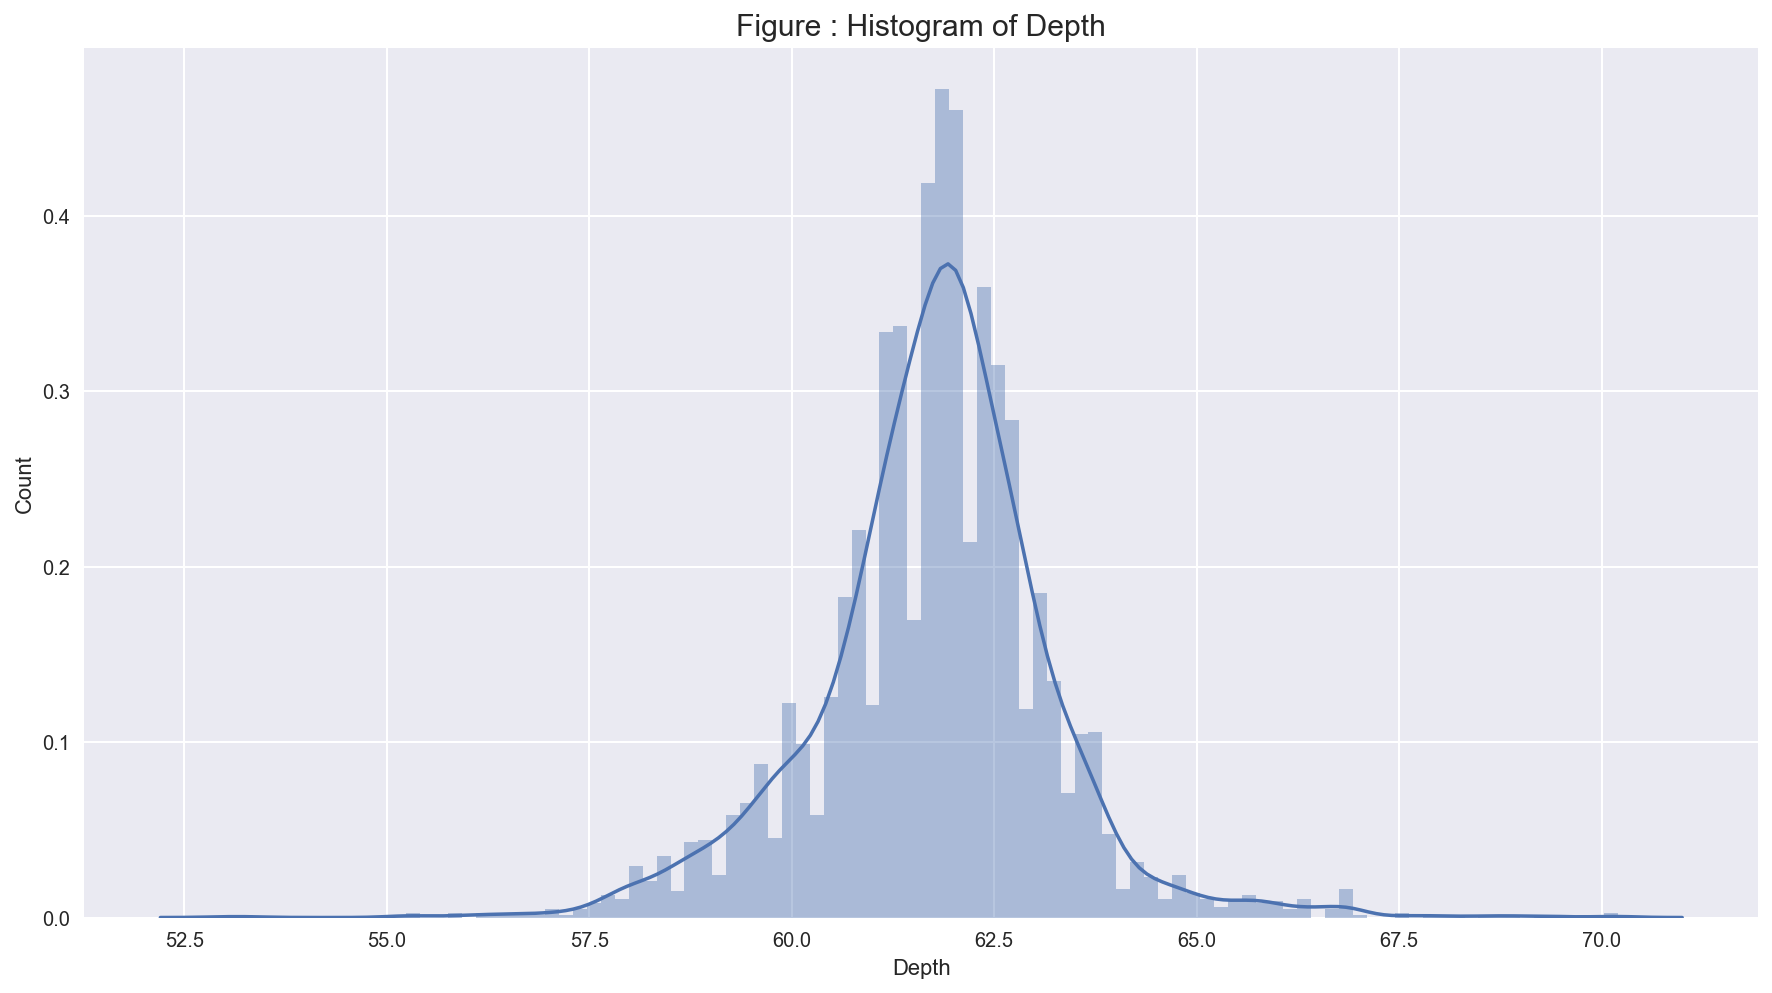

In [423]:
plt.figure(figsize = (15,8))
sns.distplot(ds_df['Depth'], kde=True, bins=100).set_title('Figure : Histogram of Depth', fontsize = 15)
plt.ylabel('Count')
plt.show();
# DEPTH UNIVARIABLE

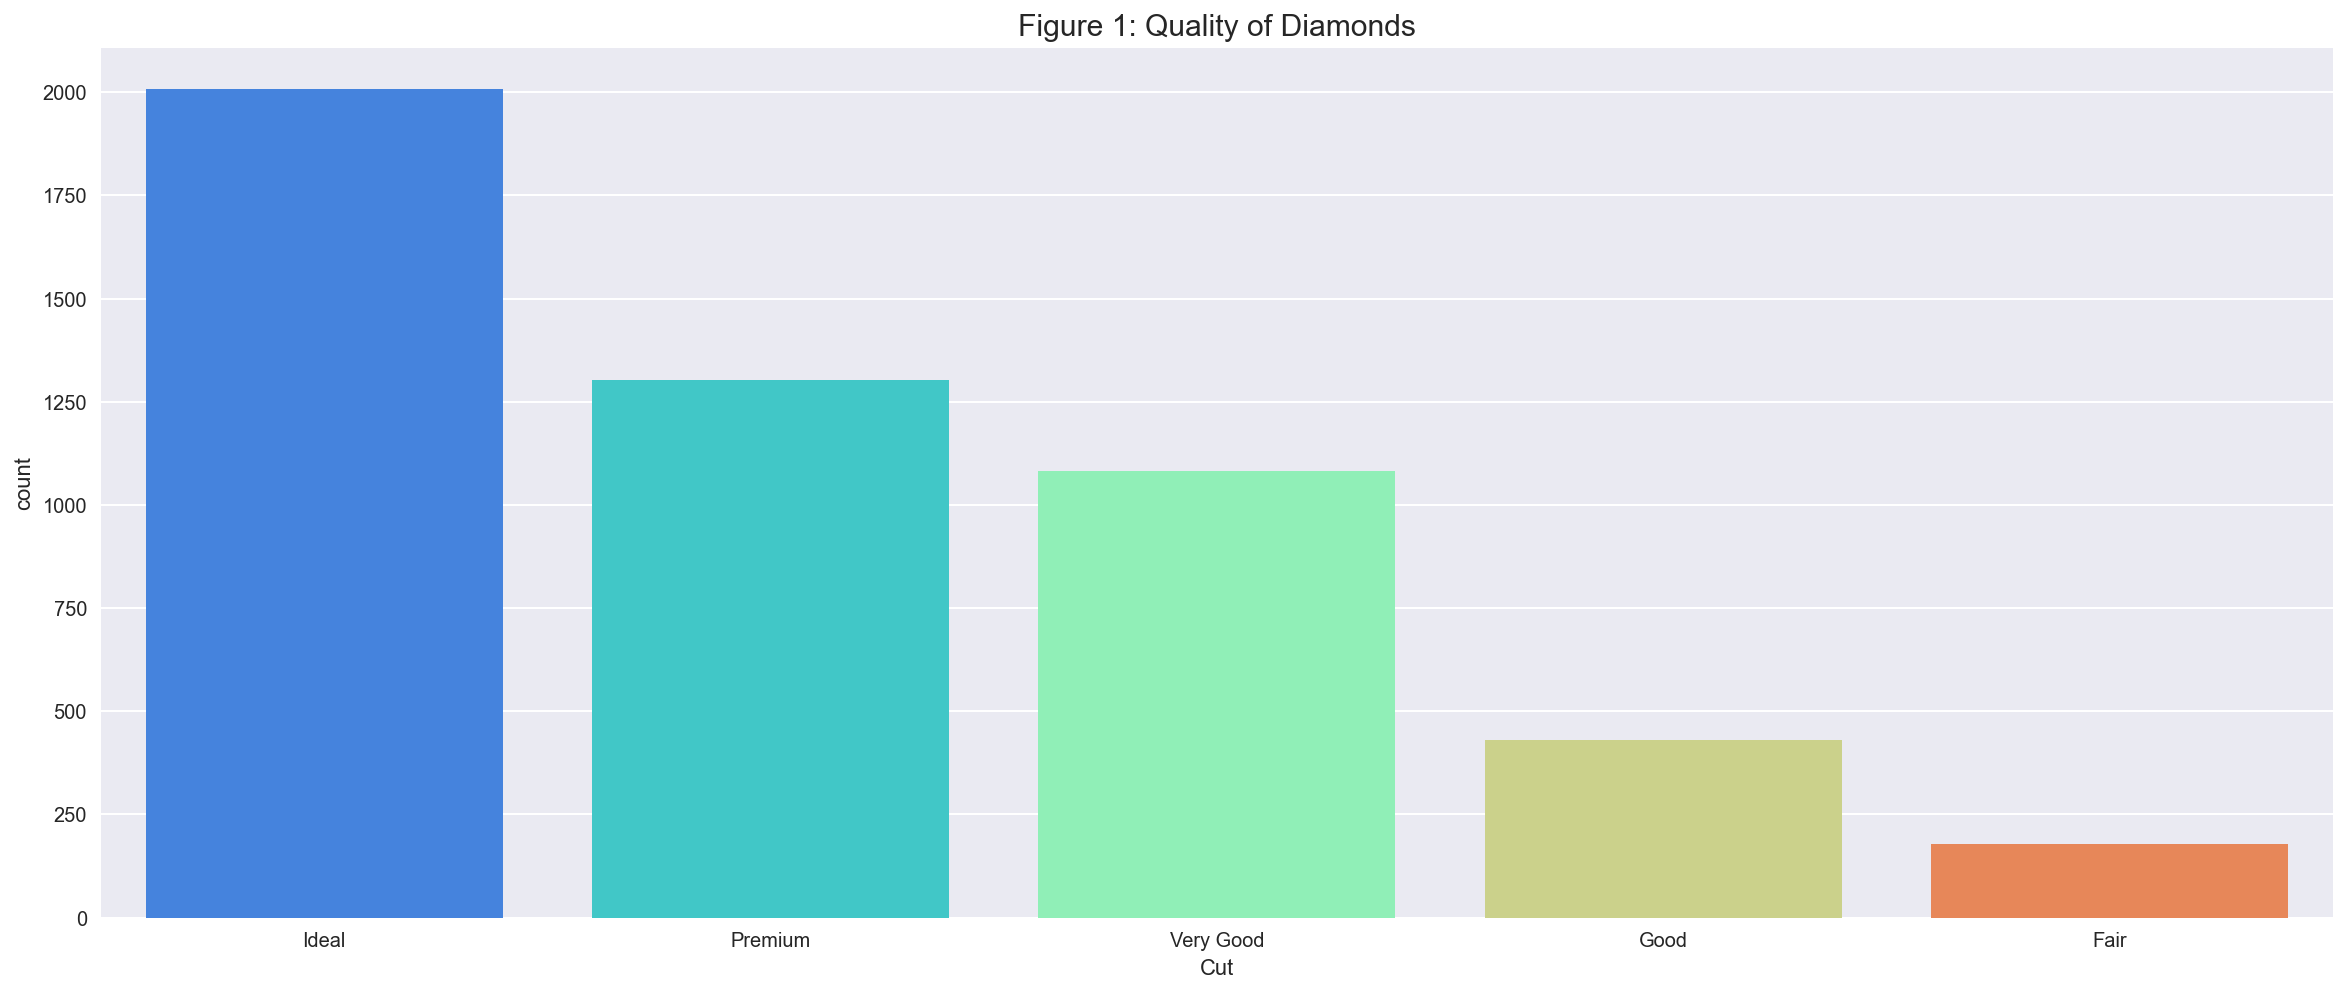

In [428]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'Cut', data = ds_df, palette = 'rainbow', 
                    order = ds_df['Cut'].value_counts().index)
fig = plt.title('Figure 1: Quality of Diamonds', fontsize = 15)
plt.show()
# CUT UNIVARIABLE

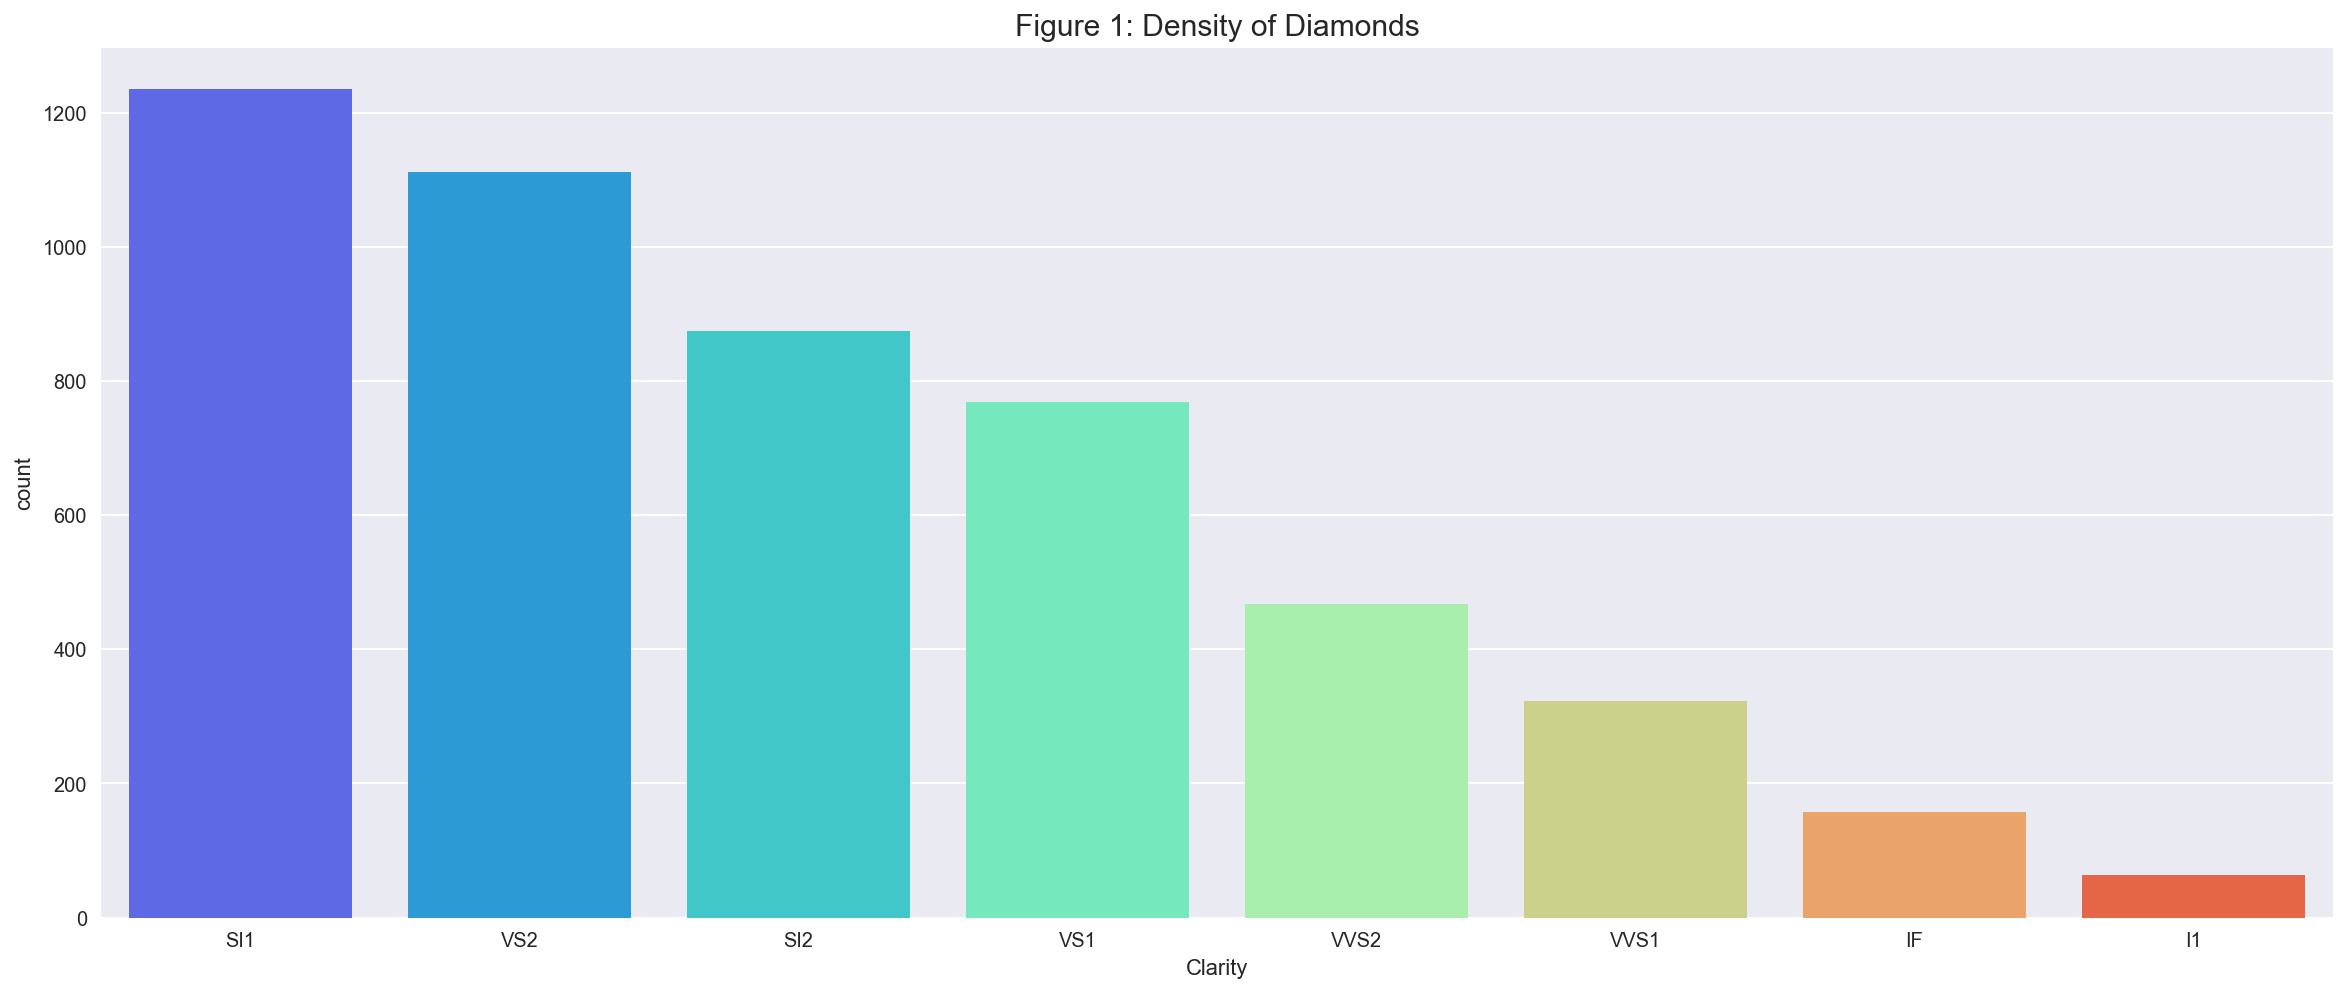

In [430]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'Clarity', data = ds_df, palette = 'rainbow', 
                    order = ds_df['Clarity'].value_counts().index)
fig = plt.title('Figure 1: Density of Diamonds', fontsize = 15)
plt.show()
# Clarity UNIVARIABLE

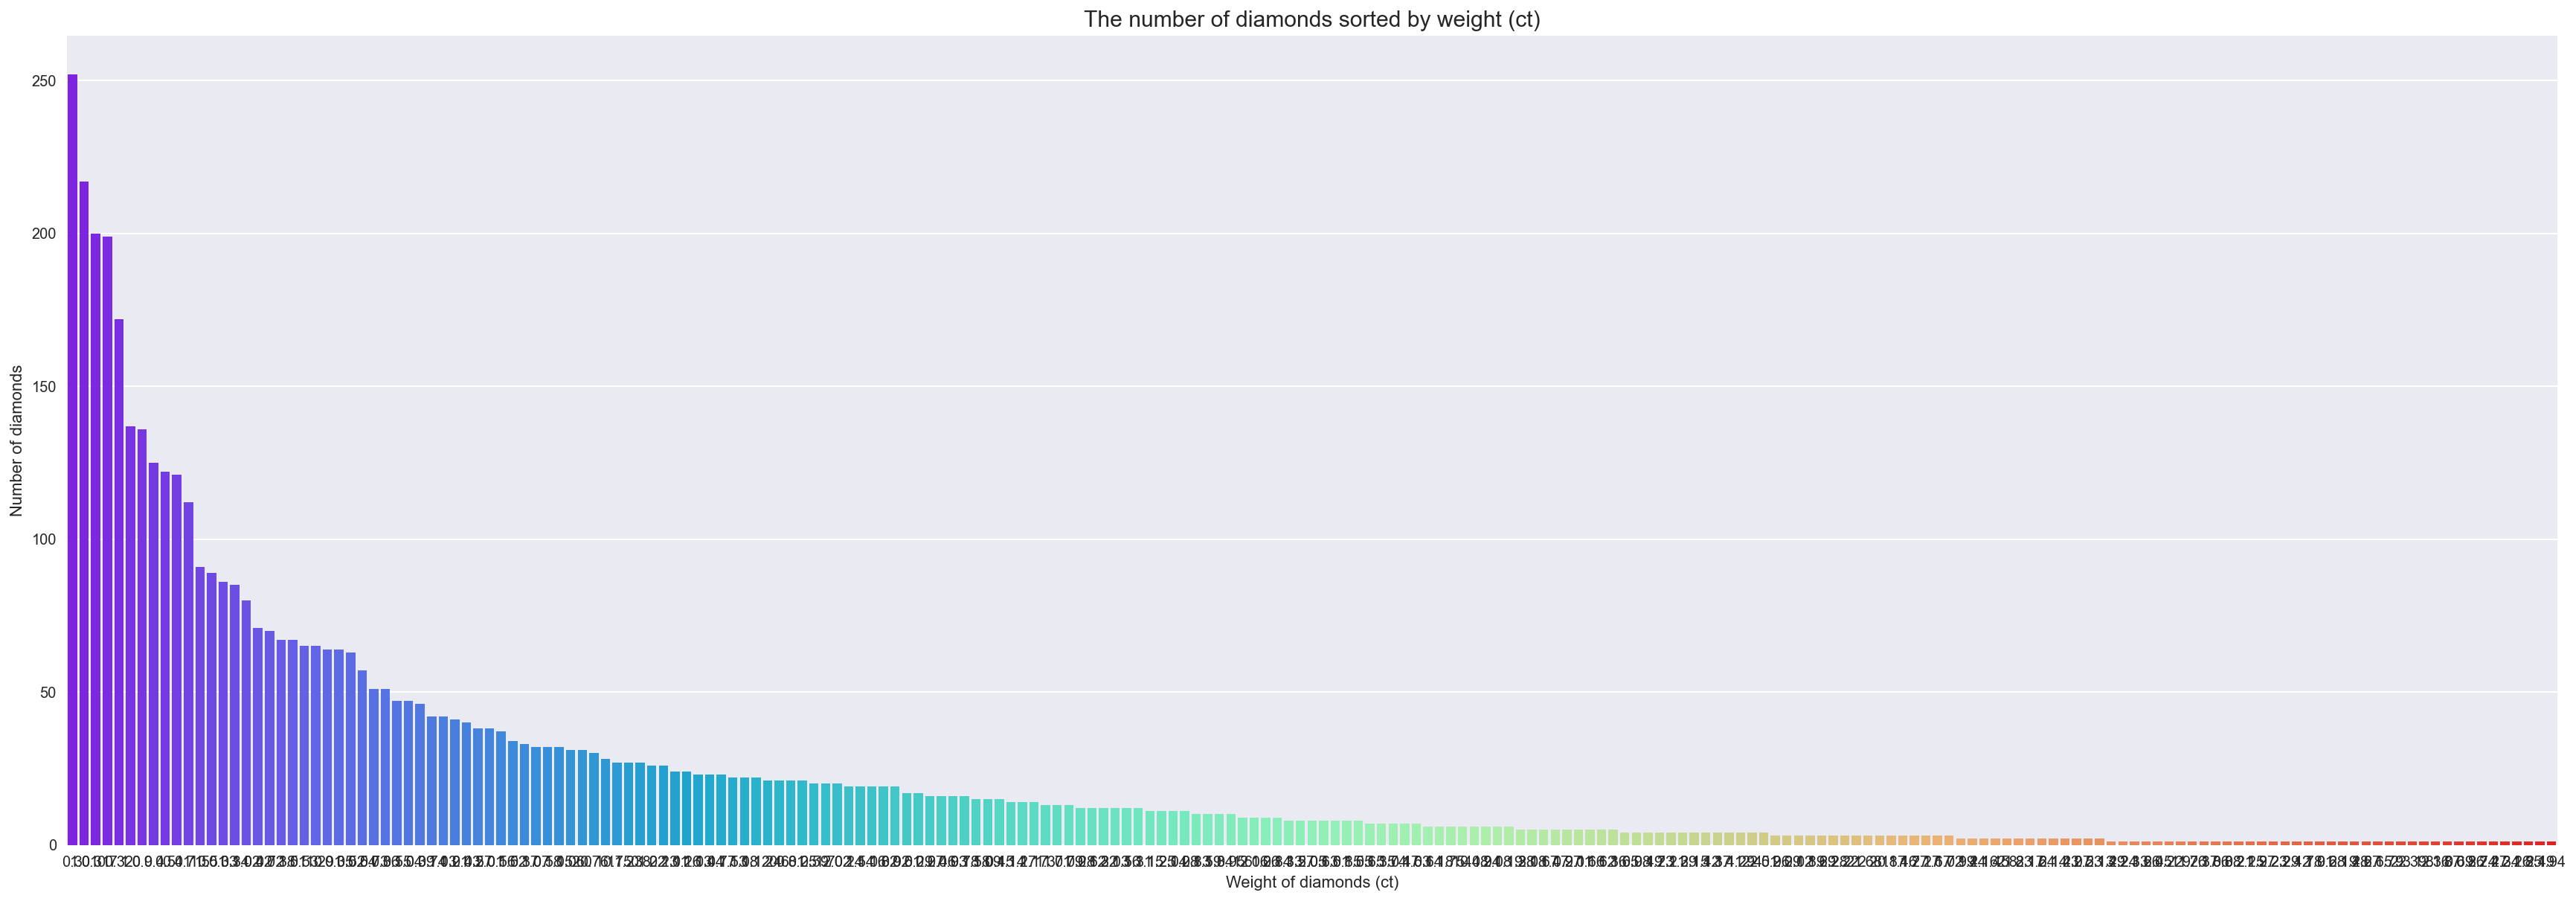

In [438]:
plt.figure(figsize = (30,10))
fig = sns.countplot(x = 'Weight', data = ds_df, palette = 'rainbow', 
                    order = ds_df['Weight'].value_counts().index)
fig = plt.title('The number of diamonds sorted by weight (ct)', fontsize = 15)
plt.xlabel("Weight of diamonds (ct)")
plt.ylabel("Number of diamonds")
plt.show()

### Two Variable Plot

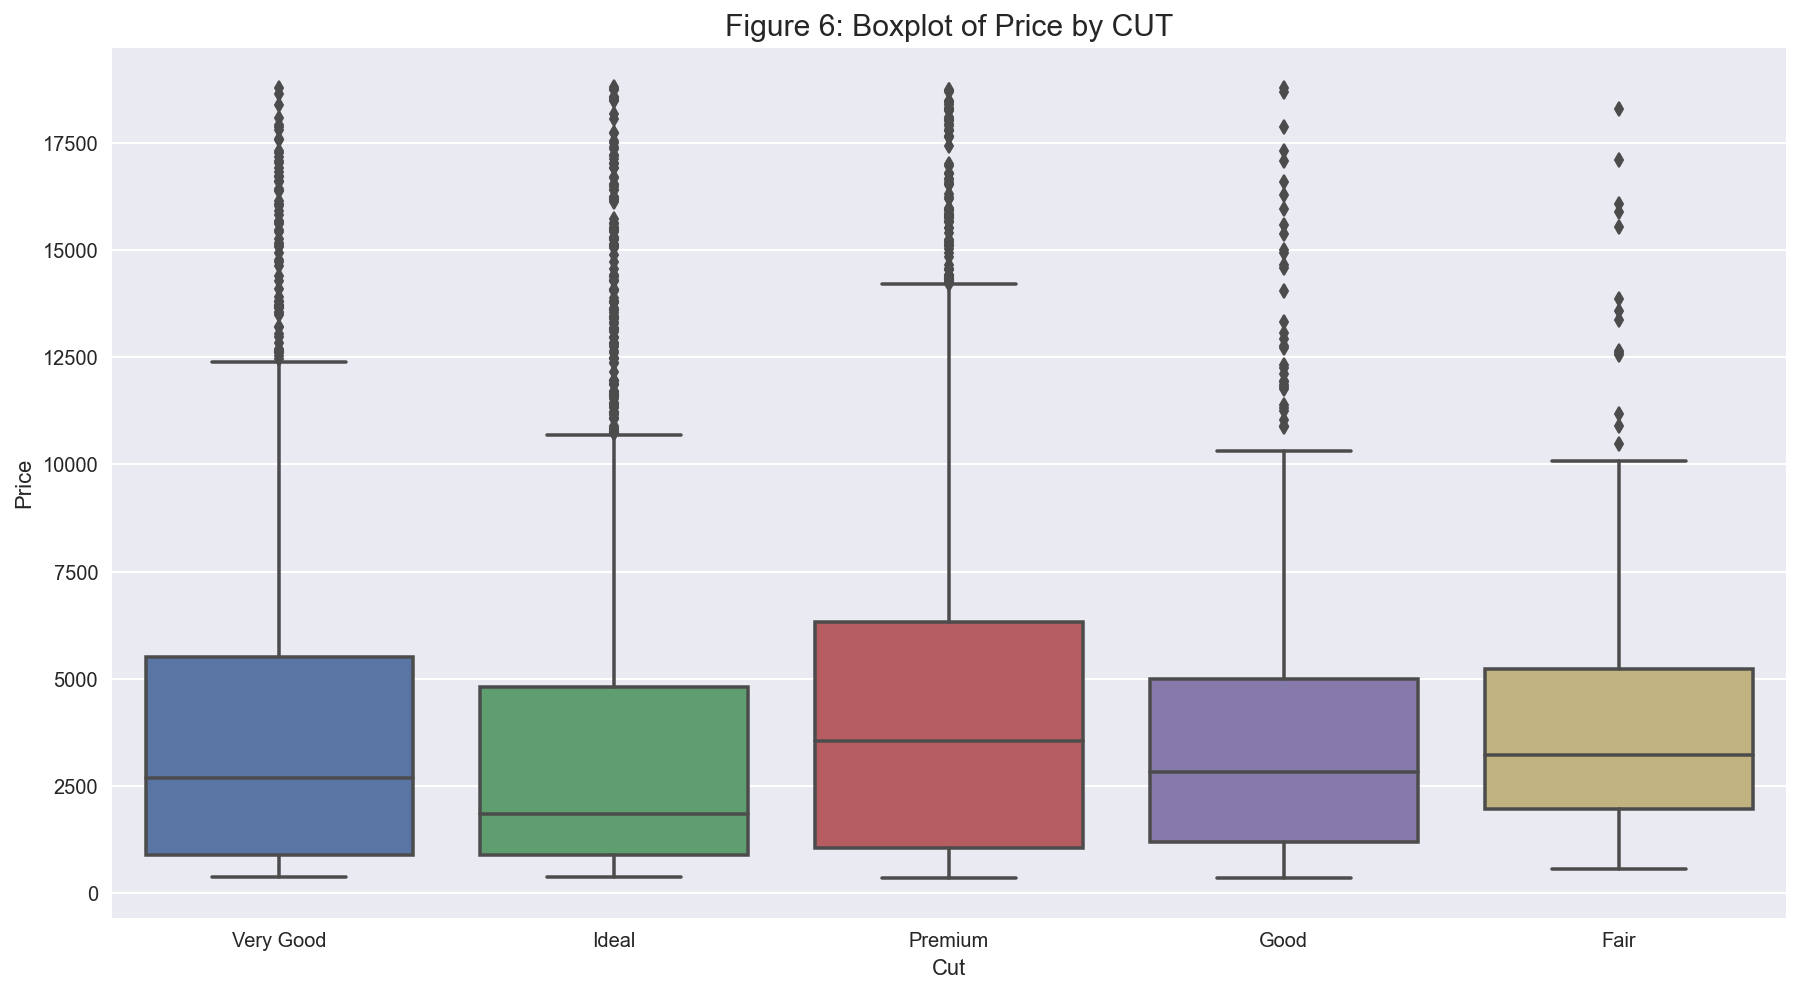

In [432]:
plt.figure(figsize = (15,8))
sns.boxplot(ds_df['Cut'], ds_df['Price']);
plt.title('Figure 6: Boxplot of Price by CUT', fontsize = 15)
plt.show();
#  2 VARIABLE PLOT FOR CUT AND PRICE

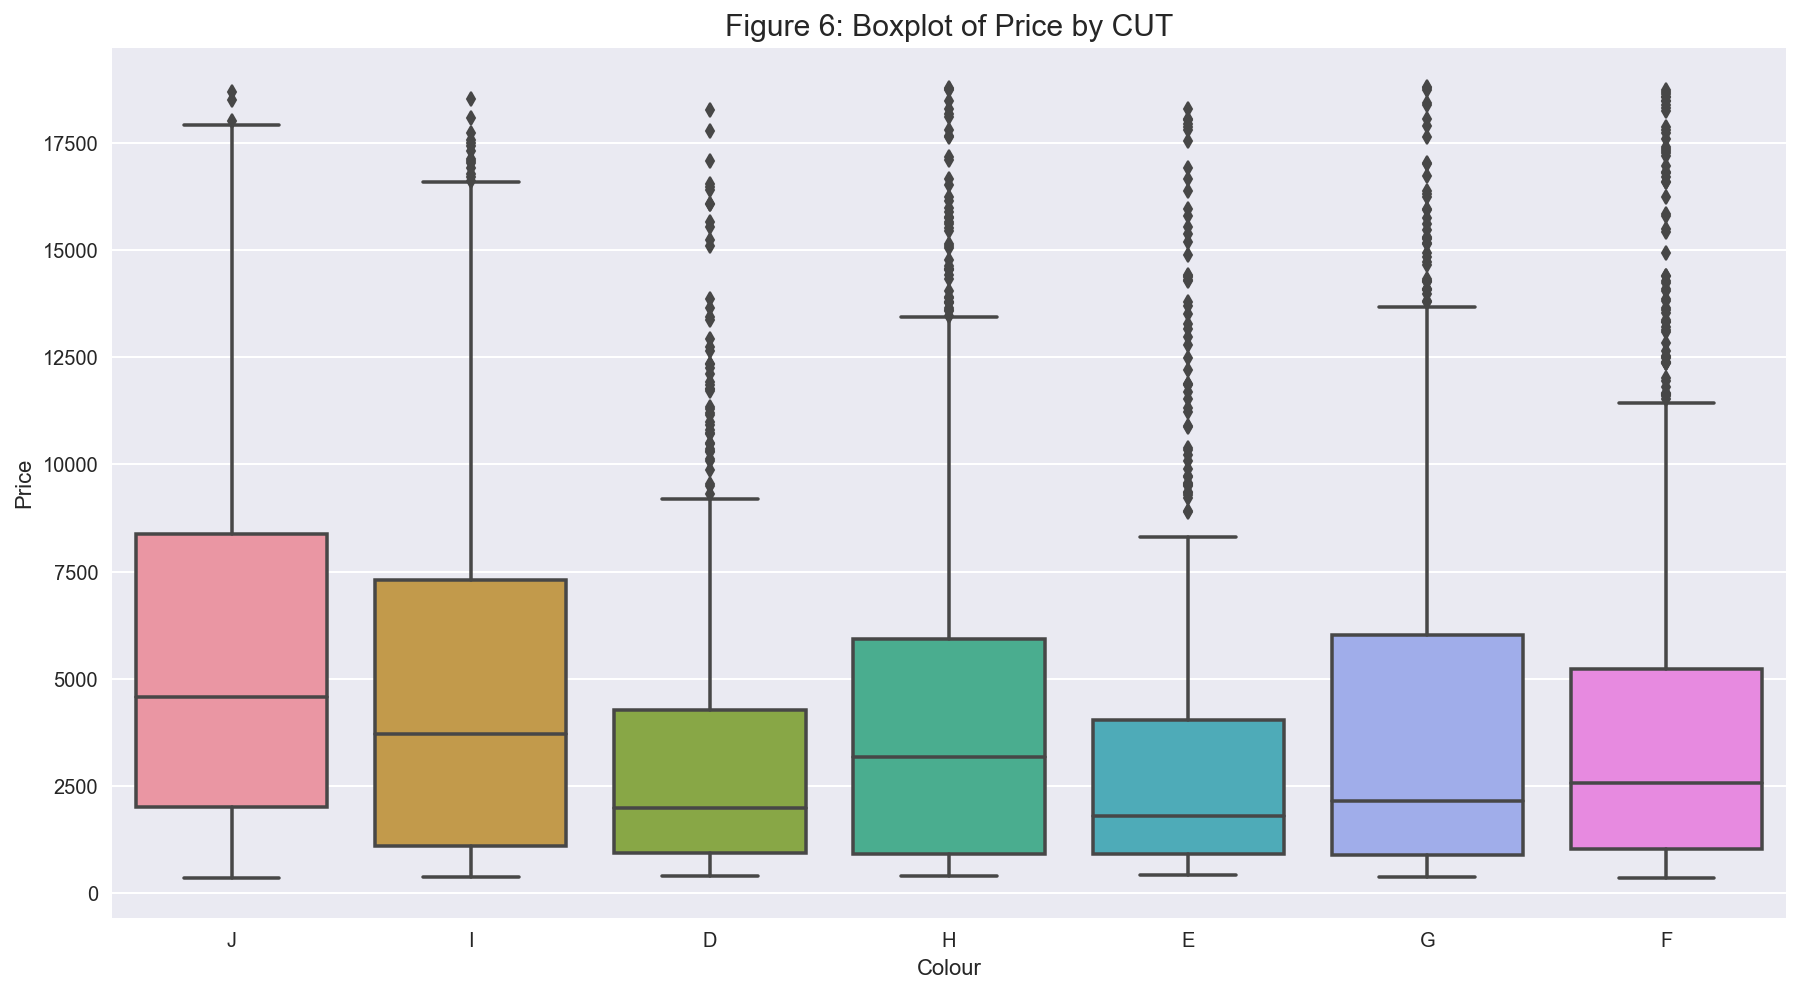

In [433]:
plt.figure(figsize = (15,8))
sns.boxplot(ds_df['Colour'], ds_df['Price']);
plt.title('Figure 6: Boxplot of Price by CUT', fontsize = 15)
plt.show();
#  2 VARIABLE PLOT FOR COLOR AND PRICE

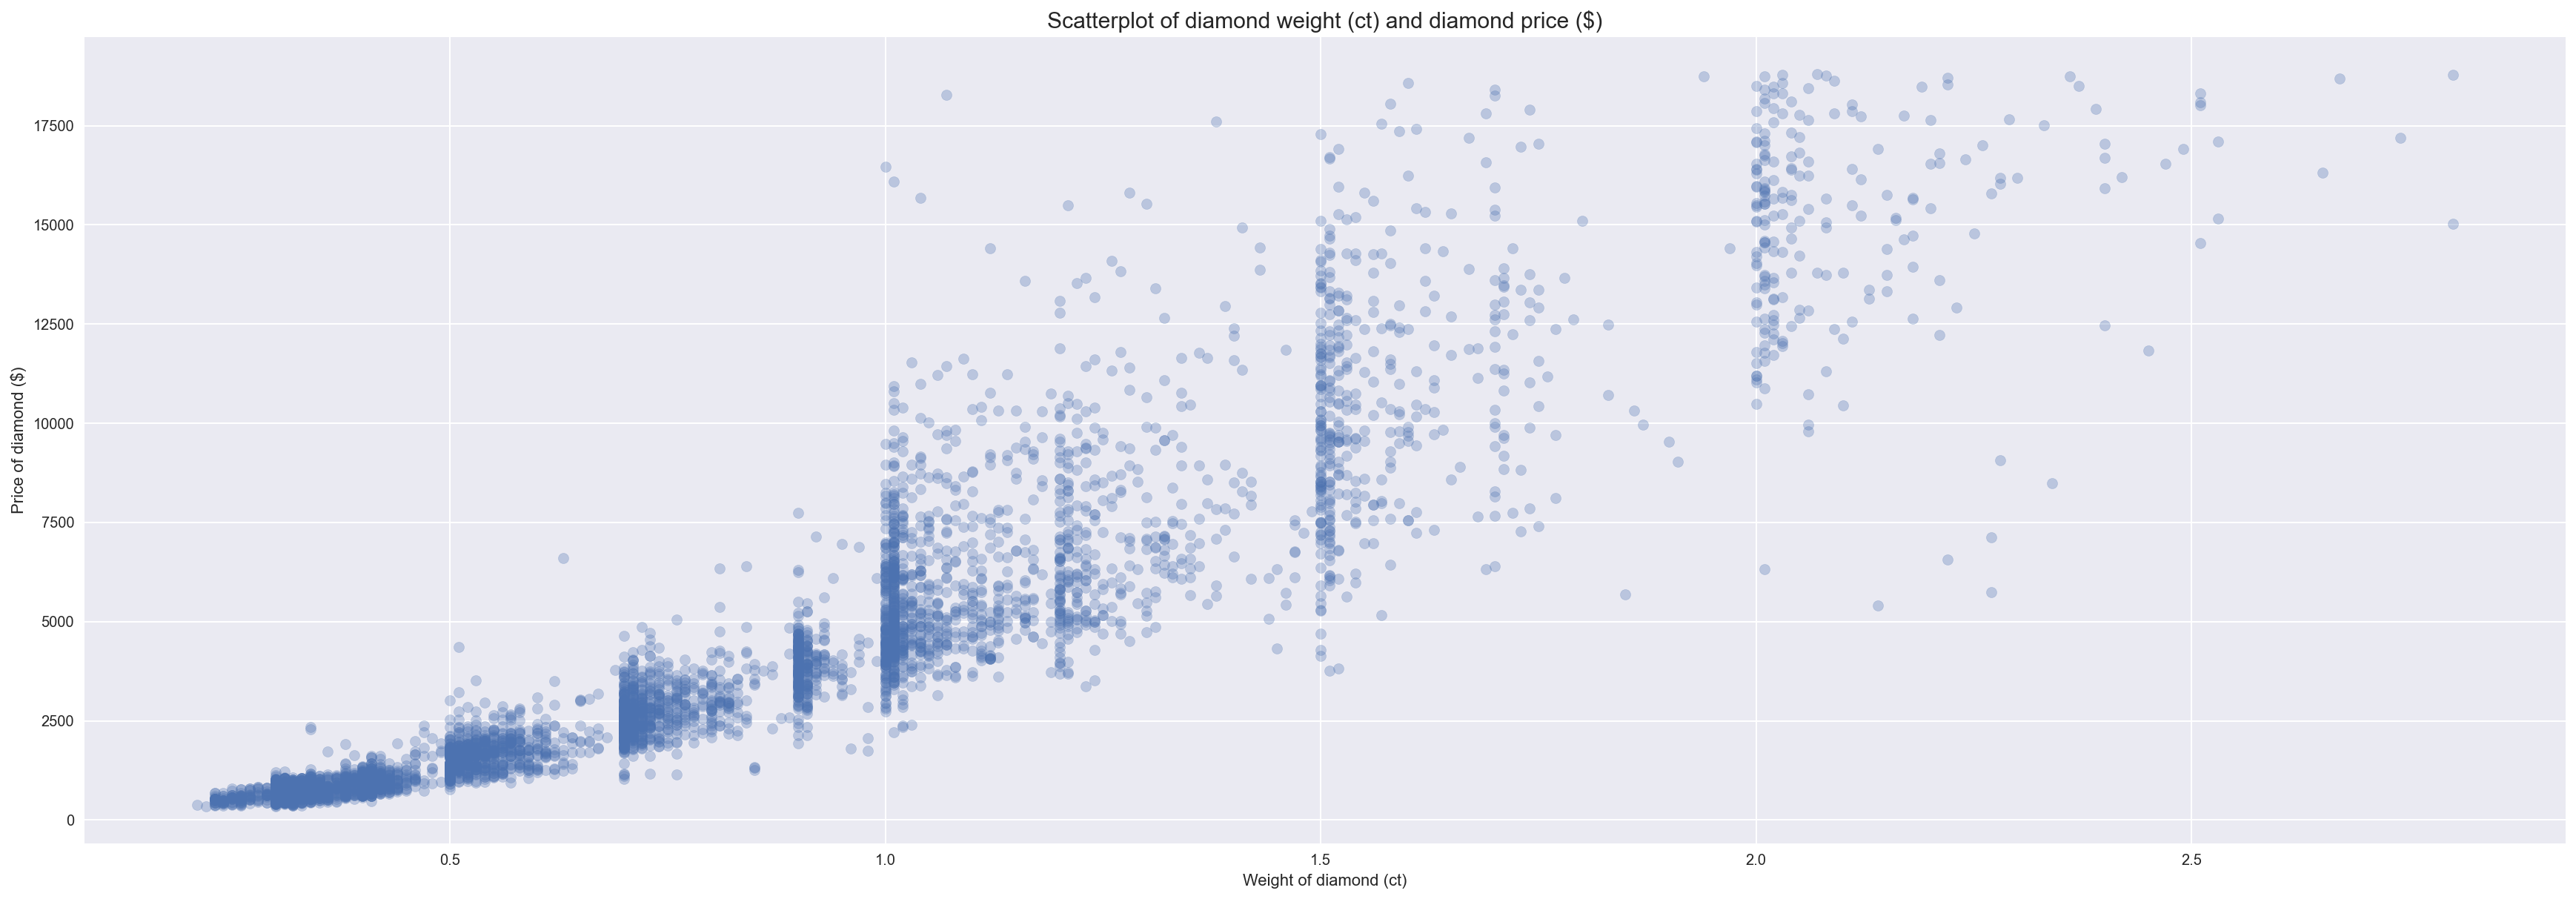

In [439]:
plt.figure(figsize = (30,10))
plt.scatter(ds_df['carat'], ds_df['price'], alpha = 0.3)
plt.title('Scatterplot of diamond weight (ct) and diamond price ($)', fontsize = 15)
plt.xlabel('Weight of diamond (ct)')
plt.ylabel('Price of diamond ($)')
plt.show();

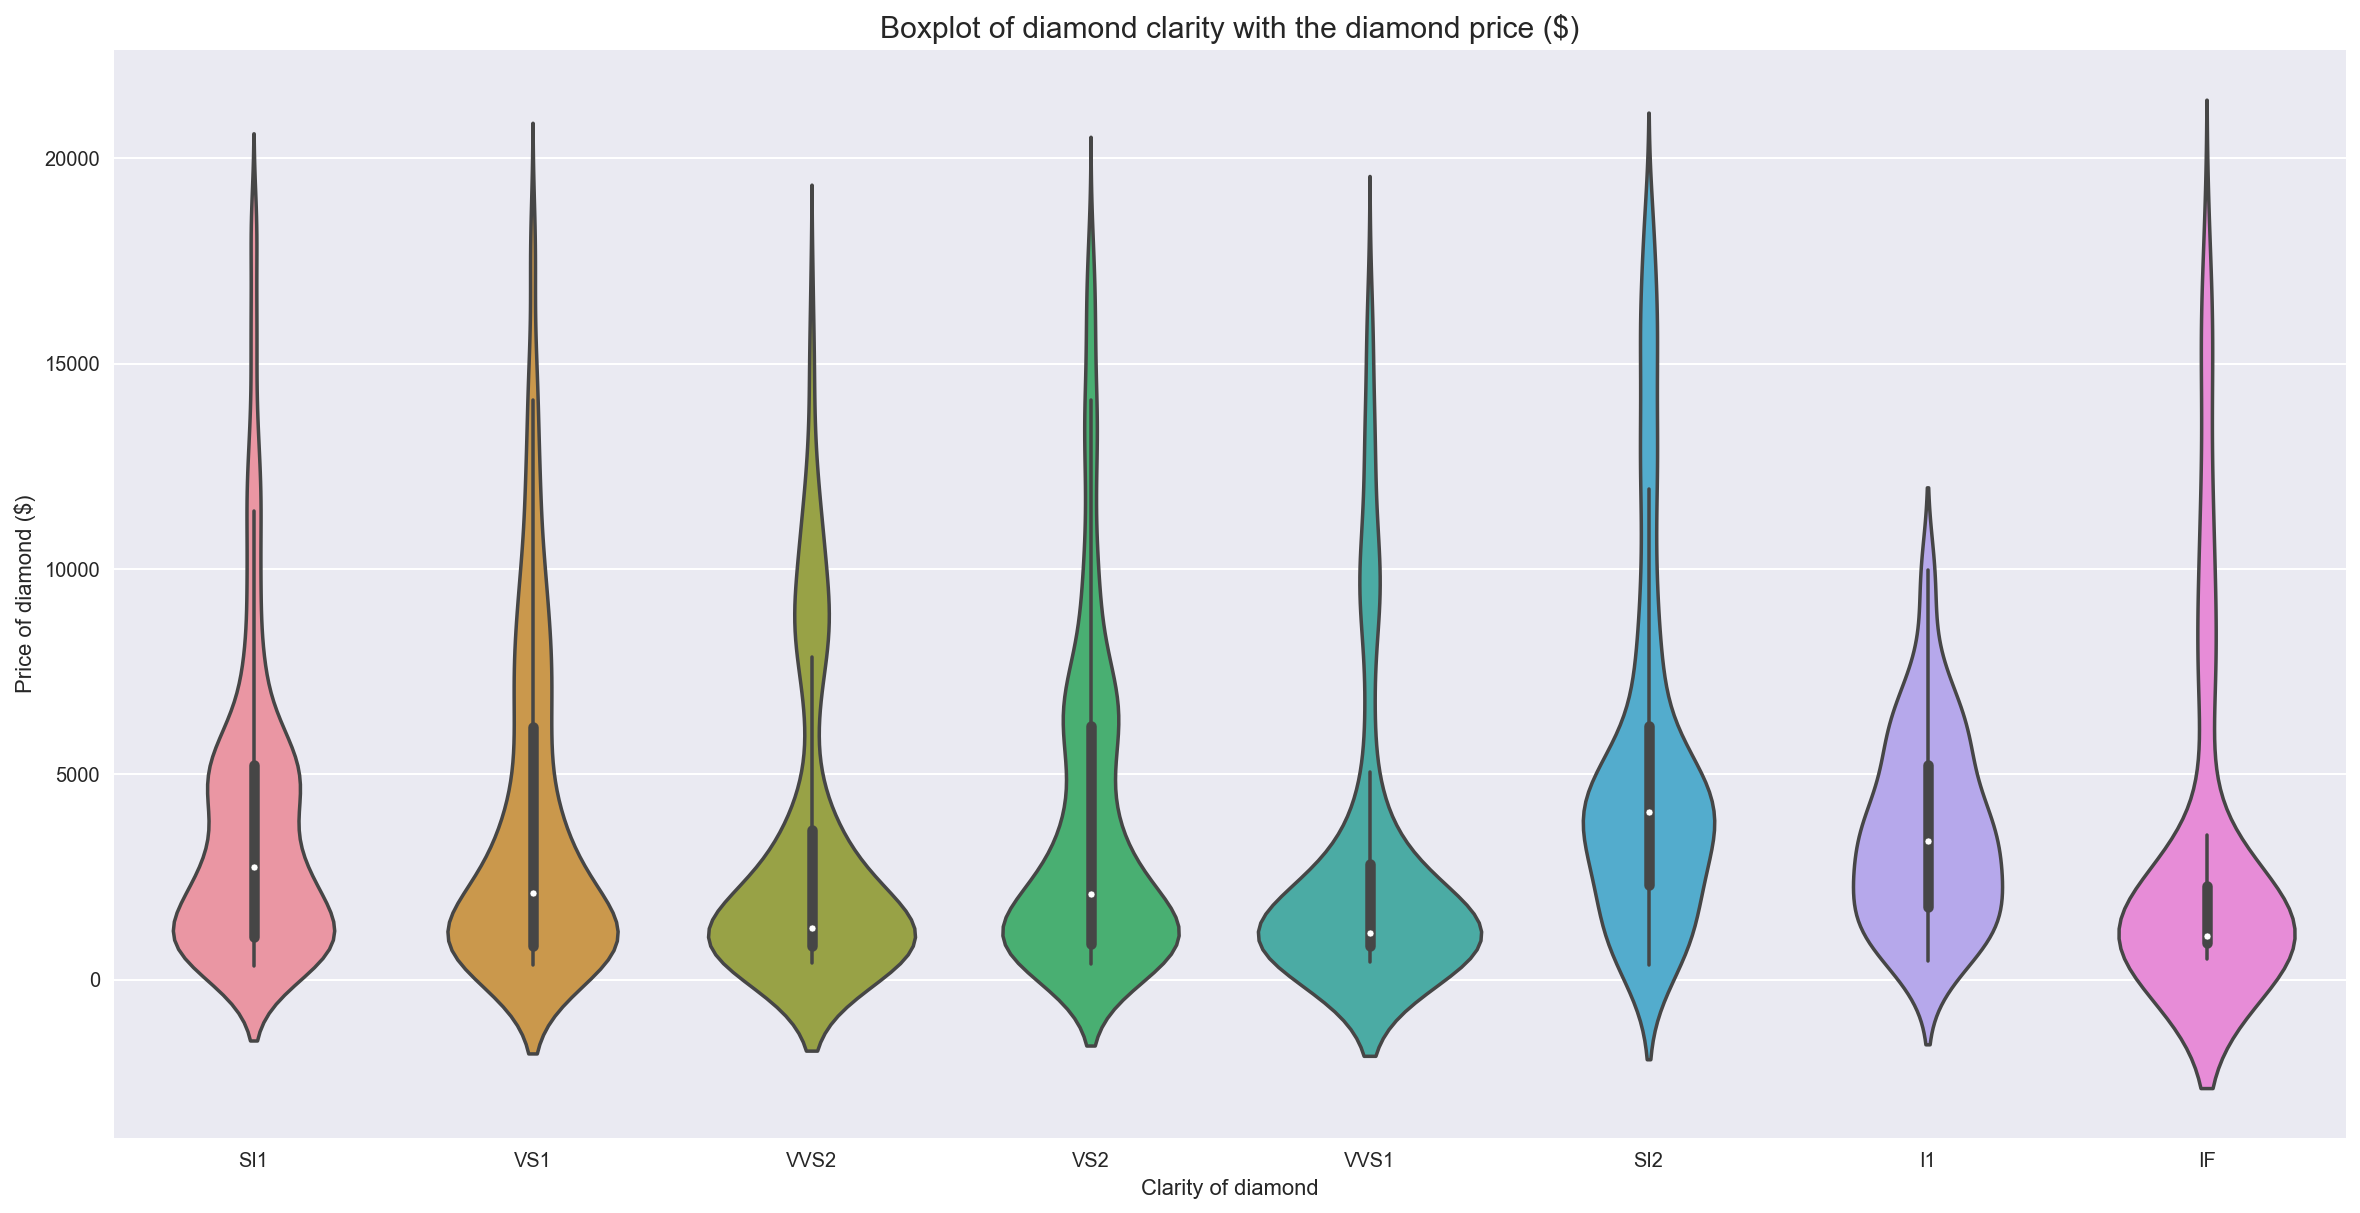

In [440]:
plt.figure(figsize = (20,10))
sns.violinplot(data=ds_df, x=ds_df['Clarity'], y=ds_df['Price']);
plt.title('Boxplot of diamond clarity with the diamond price ($)', fontsize = 15)
plt.xlabel("Clarity of diamond")
plt.ylabel("Price of diamond ($)")
plt.show();

### Three Variable Plot

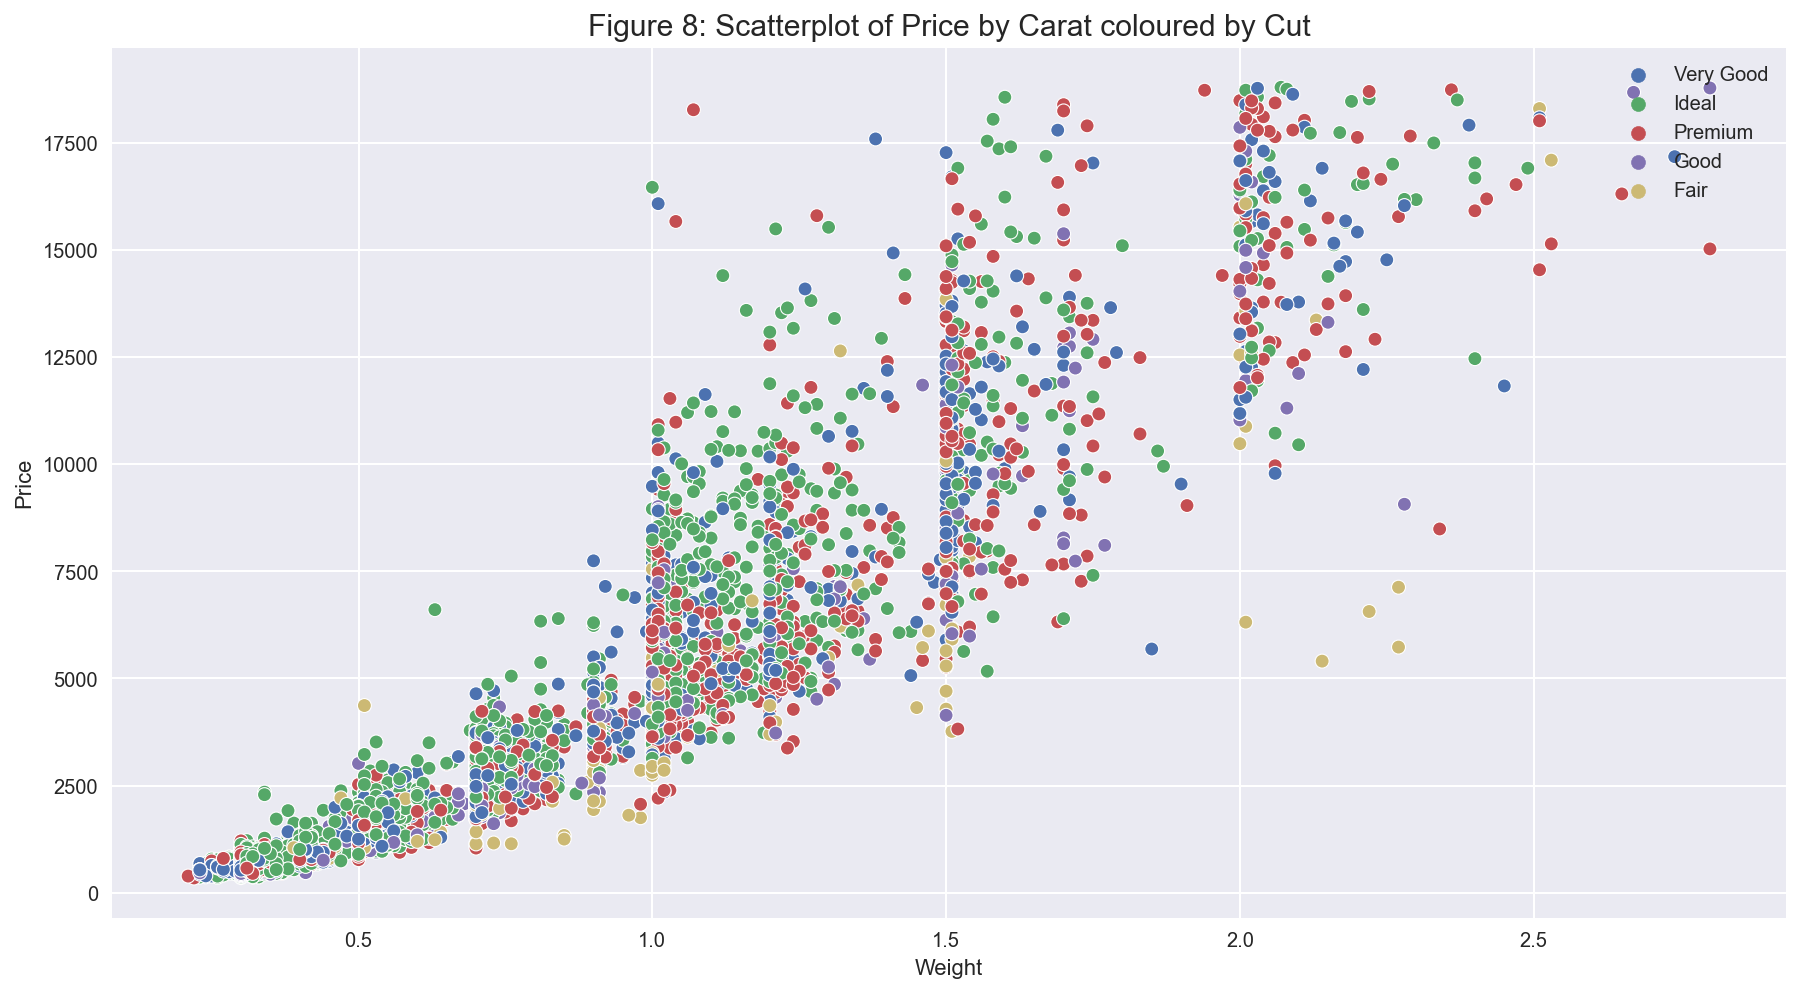

In [434]:
plt.figure(figsize = (15,8))
sns.scatterplot(ds_df['Weight'], ds_df['Price'], hue = ds_df['Cut'])
plt.title('Figure 8: Scatterplot of Price by Carat coloured by Cut', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();
# 3 VARIABLE price, carat , cut

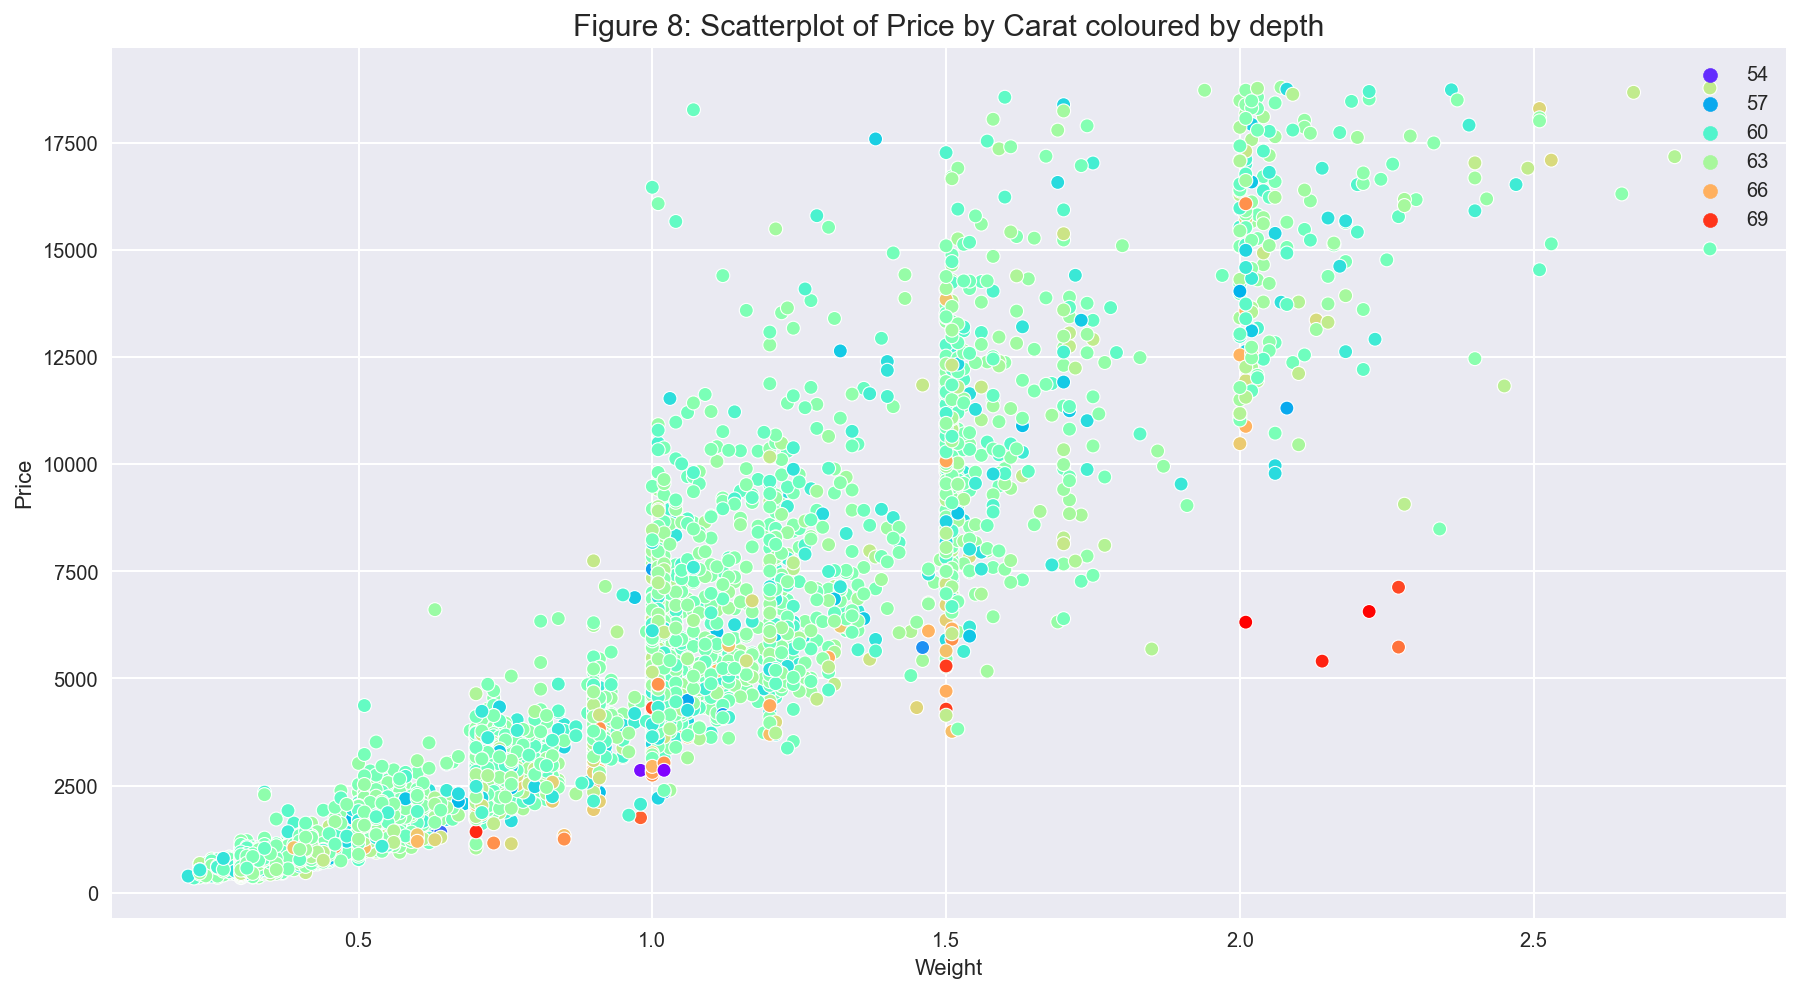

In [436]:
plt.figure(figsize = (15,8))
sns.scatterplot(ds_df['Weight'], ds_df['Price'], hue = ds_df['Depth'], palette='rainbow')
plt.title('Figure 8: Scatterplot of Price by Carat coloured by depth', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();
# 3 VARIABLE price, carat , depth

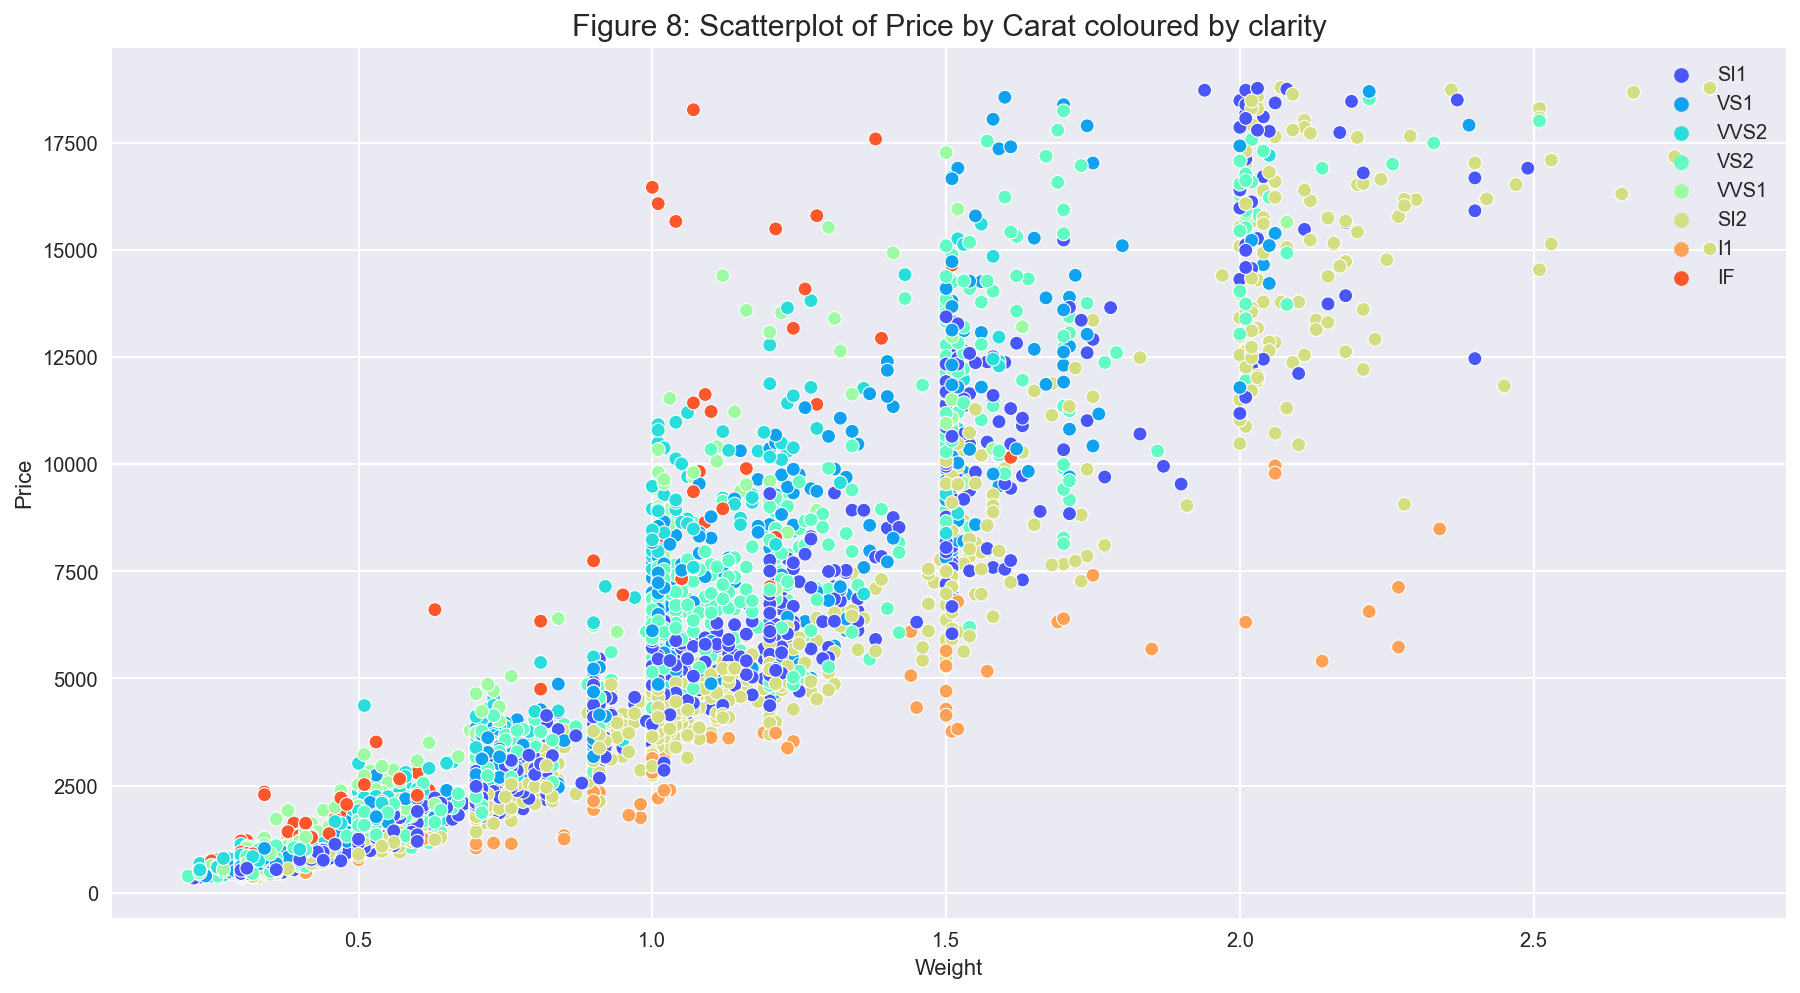

In [437]:
plt.figure(figsize = (15,8))
sns.scatterplot(ds_df['Weight'], ds_df['Price'], hue = ds_df['Clarity'], palette='rainbow')
plt.title('Figure 8: Scatterplot of Price by Carat coloured by clarity', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();
# 3 VARIABLE price, carat , clarity

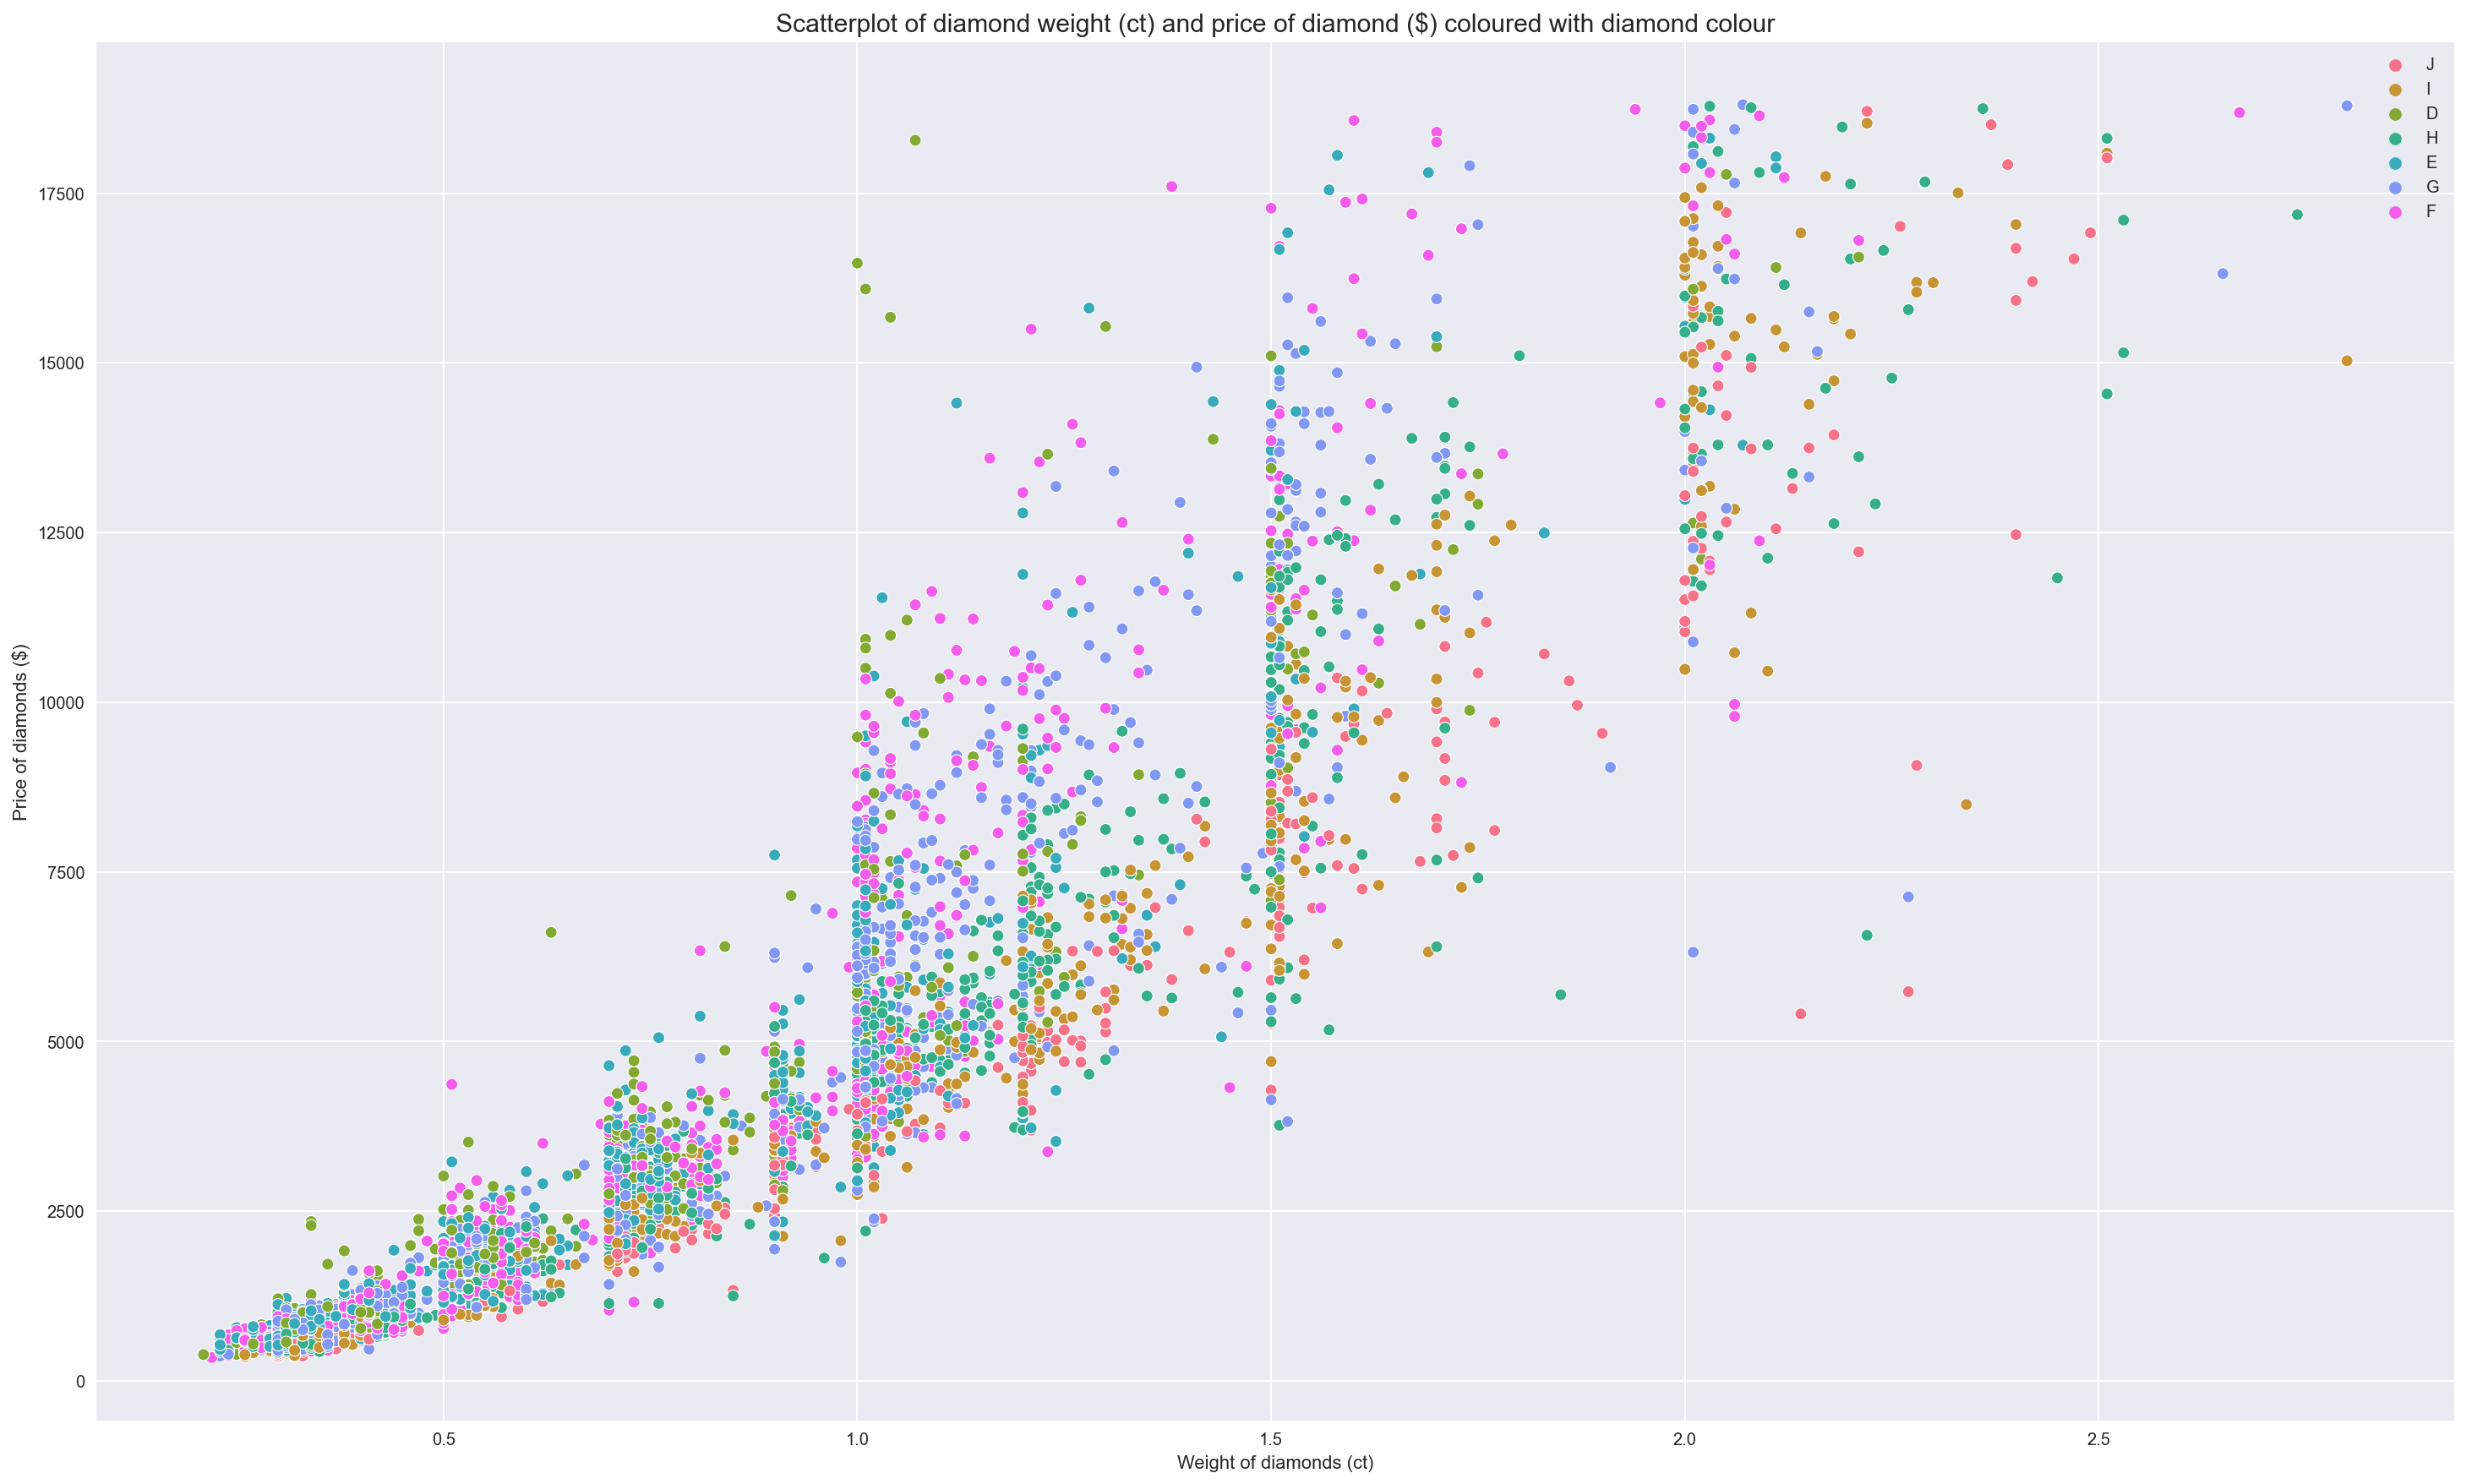

In [442]:
plt.figure(figsize = (25,15))
sns.scatterplot(ds_df['Weight'], ds_df['Price'], hue = ds_df['Colour'])
plt.title('Scatterplot of diamond weight (ct) and price of diamond ($) coloured with diamond colour', fontsize = 15);
plt.legend(loc = 'upper right')
plt.ylabel("Price of diamonds ($)")
plt.xlabel("Weight of diamonds (ct)")
plt.show();

## Literature Review

Insert Here

## Summary & Conclusion

Insert Here

## References

Insert Here